In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 준비

In [53]:
df = sns.load_dataset("titanic")

In [54]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 데이터 탐색

In [55]:
df.shape

(891, 15)

In [56]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [57]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [58]:
# 교재는 일단 뇌피셜로 진행할것임

In [59]:
# 결측 개많은 deck 삭제
# embarked 내용겹치는 embark_twn 열 삭제

In [60]:
rdf = df.drop(["deck","embark_town"], axis=1)

In [61]:
# age 열에 결측치가 있는 행을 모두 삭제
rdf = rdf.dropna(subset=["age"], axis = 0)

In [62]:
rdf.shape

(714, 13)

In [63]:
rdf.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [64]:
# embarked 승선 도시 전처리

In [65]:
rdf["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [66]:
# 최빈값확인
rdf["embarked"].value_counts()

embarked
S    554
C    130
Q     28
Name: count, dtype: int64

In [67]:
# 최빈값으로 치환하기
most_freq = rdf["embarked"].value_counts().idxmax()
most_freq

'S'

In [68]:
rdf["embarked"] = rdf["embarked"].fillna(most_freq)

In [69]:
rdf.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

# 분석에 사용할 속성을 선택

In [70]:
rdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [71]:
ndf = rdf[["survived","pclass","sex","age","sibsp","parch","embarked"]]

In [72]:
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [73]:
# 원핫 인코딩 - 범주형 데이터를 인식할 수 있도록 숫자형 변환
onehot_sex = pd.get_dummies(ndf["sex"])
# onehot_sex = pd.get_dummies(ndf["sex"], dtype =int)

In [74]:
onehot_sex

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [75]:
ndf = pd.concat([ndf, onehot_sex], axis =1)

In [76]:
ndf.head()

,survived,pclass,sex,age,sibsp,parch,embarked,female,male
0,0,3,male,22.0,1,0,S,False,True
1,1,1,female,38.0,1,0,C,True,False
2,1,3,female,26.0,0,0,S,True,False
3,1,1,female,35.0,1,0,S,True,False
4,0,3,male,35.0,0,0,S,False,True


In [77]:
onehot_embarked = pd.get_dummies(ndf["embarked"], prefix = "town")
# prefix = "town" 보기편하라고 접두어 넣기했으용

In [78]:
onehot_embarked.head()

,town_C,town_Q,town_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True


In [79]:
ndf = pd.concat([ndf, onehot_embarked], axis =1)

In [80]:

ndf = ndf.drop(["sex","embarked"], axis = 1)

,survived,pclass,sex,age,sibsp,parch,embarked,female,male,town_C,town_Q,town_S
0,0,3,male,22.0,1,0,S,False,True,False,False,True
1,1,1,female,38.0,1,0,C,True,False,True,False,False
2,1,3,female,26.0,0,0,S,True,False,False,False,True
3,1,1,female,35.0,1,0,S,True,False,False,False,True
4,0,3,male,35.0,0,0,S,False,True,False,False,True


In [83]:
ndf.head()

,survived,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,False,True,False,False,True
1,1,1,38.0,1,0,True,False,True,False,False
2,1,3,26.0,0,0,True,False,False,False,True
3,1,1,35.0,1,0,True,False,False,False,True
4,0,3,35.0,0,0,False,True,False,False,True


# 데이터 셋 분할

In [88]:
# 변수들이 survived에 상관이 있는지 없는지 확인

In [84]:
# 변수 선택 
x = ndf.drop("survived", axis = 1) # survived 빼고 모두 독립변수로 넣기
y = ndf["survived"] # 정답임

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y, random_state=31)

In [ ]:
# 30퍼의 테스트 데이터 

In [87]:
print(len(x_train))
print(len(x_test))

499
215


# KNN 분류

In [89]:
# 분류모형 객체 생성
knn = KNeighborsClassifier(n_neighbors = 5)

In [90]:
# 모델학습
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [91]:
# test data 에 대한 예측
y_pred = knn.predict(x_test)

In [95]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

# 정답값이랑 예측값이랑 비교하기 위해서 df 에 넣어서 확인하는거임 

In [126]:
pd.DataFrame(
    {
        "ans" : y_test, # 정답
        "pred" : y_pred # 예측값
    }
)

,ans,pred
436,0,1
536,0,0
146,1,0
184,1,1
221,0,0
...,...,...
861,0,0
876,0,0
381,1,1
433,0,0


In [96]:
# 정확도에서는 이진분류에서는 위험함
# 적절한 평가지표가 필요하다

# 모델 평가

In [97]:
knn_matrix = confusion_matrix(y_test, y_pred)

In [100]:
# 0인 레이블을 0이라한경우, 0인 레이블을 1이라 한 경우
# 1인 레이블을 0이라한경우, 1인 레이블을 1이라 한 경우
knn_matrix

array([[114,  14],
       [ 28,  59]])

## 오차 행렬
<img src ="./image/confusion.png">

- 이진 분류에서 성능 지표로 잘 활용됨
- 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표
    - 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지 함께 나타냄

In [101]:
# 예측값이 너무 많으면 히트맵을 써서 시각화를 하기도 함

In [102]:
knn_report = classification_report(y_test, y_pred)

In [103]:
print(knn_report)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       128
           1       0.81      0.68      0.74        87

    accuracy                           0.80       215
   macro avg       0.81      0.78      0.79       215
weighted avg       0.81      0.80      0.80       215



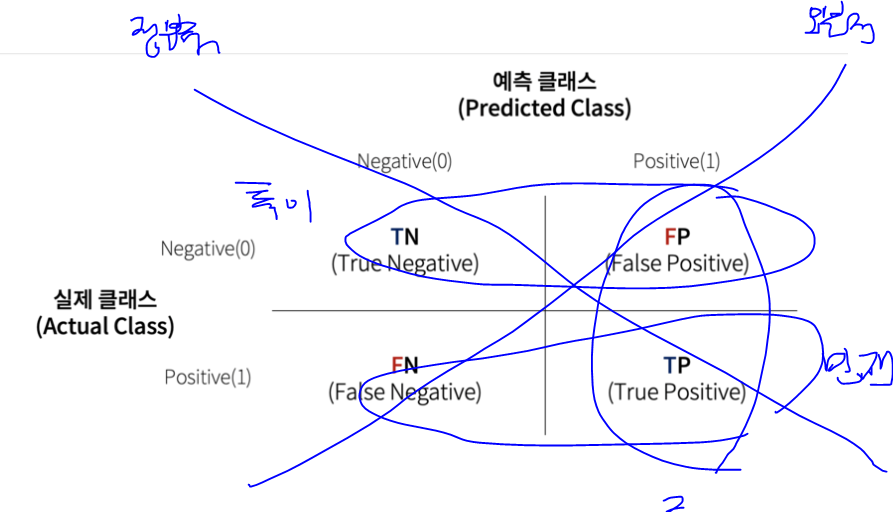

- 정확도
    - 예측 결과와 실제값 동일 수 / 전체
- 정밀도
    - 양성으로 예측한 데이터중 실제 양성인
 
    - 정밀도가 더 중요한 지표인 경우는 양성으로 분류된 데이터가 실제로는 양성이 아니라면 업무상 큰 영향이 발생
 
    - 예) 스팸메일 판단 모델: 일반 메일을 스팸 메일로 잘못분류하면 메일을 아예받지 못할 수 잇어 업무 차질

In [104]:
# 정밀도가 높다고 해서 다 좋은건 아니다
# 낮은것도...
# 적절하게 프로젝트에 따라 달라짐

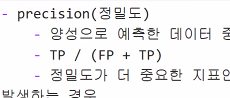

- recall(재현율, 민감도)
    - 실제 양성인 데이터 중 양성으로 예측한 비율
    - TP / ( FN + TP )
    - 재현율이 중요 지표인 경우는 실제 양성 데이터를 음성으로 잘못 판단하게 되면 업뭄상 큰 영향이 발생하는 경우
    - 예) 암 판단 모델 : 암환자를 음성으로 잘못 판단한다면 생명을 앗아갈 정도로 심각한 문제이기 때문

- specificity(특이도)
    - 실제 음성인 데이터 중 음성으로 예측한 비율
    - TN / (TN + FP)
      
- 코로나 검사키트의 경우
    - 민감도 90% 이상
        - 실제 양성인 사람이 코로나 검사를 하면 양성으로 예측될 확률 90% 이상
      
    - 특이도 99% 이상
        - 실제 음성인 사람이 코로나 검사를 하면 음성으로 예측될 확률 99% 이상
        - 경제를 선택한 한국 

# 모델 고도화

In [106]:
y.value_counts()

survived
0    424
1    290
Name: count, dtype: int64

In [107]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [108]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(scaled_train, y_train)
# 답 예측은요? knn 모델로 예측을 해보겠습니다 scaled_test 라는 값을 가지고~~~~
y_pred = knn.predict(scaled_test)

In [109]:
# 오분류표 만들어보겠습니다~~~
knn_matrix = confusion_matrix(y_test, y_pred)
knn_matrix

array([[109,  19],
       [ 24,  63]])

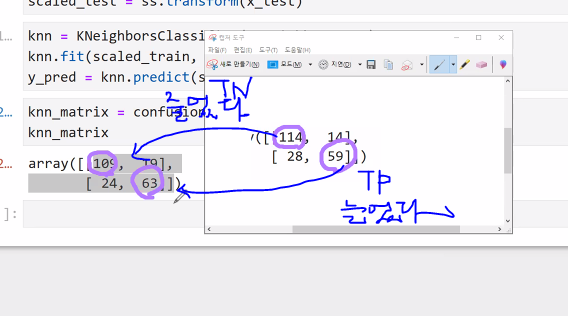

In [112]:
knn_report = classification_report(y_test, y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       128
           1       0.77      0.72      0.75        87

    accuracy                           0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215



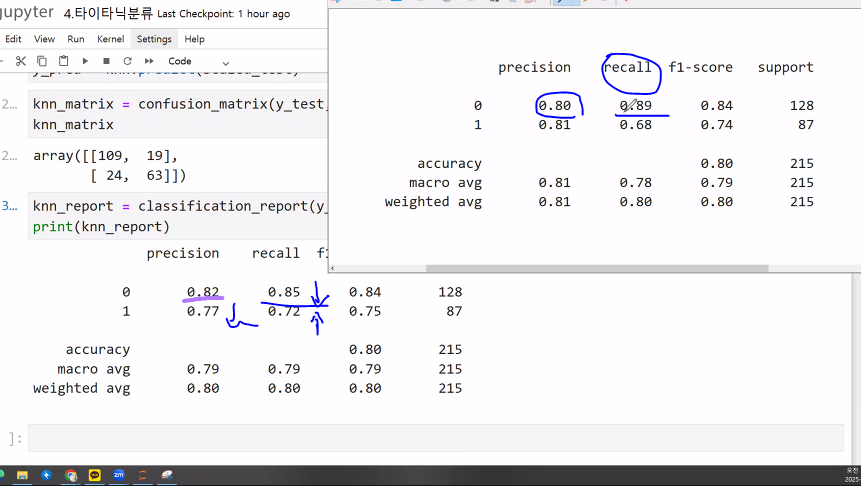

- report 를 보면 f1_score 가 조금 좋아졌음
- 근데 여기 끝이냐? 아니다~~~

1. 종속변수 비율 맞추기
2. 스케일링하기 (언더,오버)
3. k 를 조절하기

In [117]:
x_train.shape

(499, 9)

# k 설정하기
## 트레이닝의 열개수의 제곱근으로 설정한다

In [122]:
# 강사님의 경험상 k 기준
np.sqrt(x_train.shape[0])

np.float64(22.338307903688676)

In [121]:
# k가 너무 작으면 과대적합
# k가 너무 크면 과소적합

In [124]:
knn = KNeighborsClassifier(n_neighbors = 23)
knn.fit(scaled_train, y_train)
y_pred = knn.predict(scaled_test)

knn_matrix = confusion_matrix(y_test, y_pred)
knn_matrix

array([[120,   8],
       [ 33,  54]])

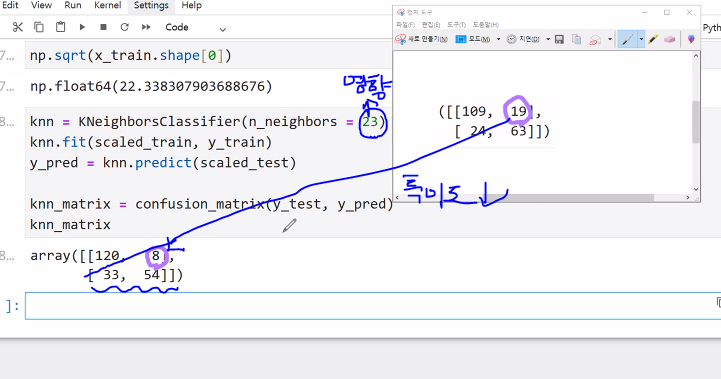

- 사망자에 대한 값은 정확해 졌지만
- 생존자에 대한 값은 보수적으로 측정됨

In [125]:
knn_report = classification_report(y_test, y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       128
           1       0.87      0.62      0.72        87

    accuracy                           0.81       215
   macro avg       0.83      0.78      0.79       215
weighted avg       0.82      0.81      0.80       215



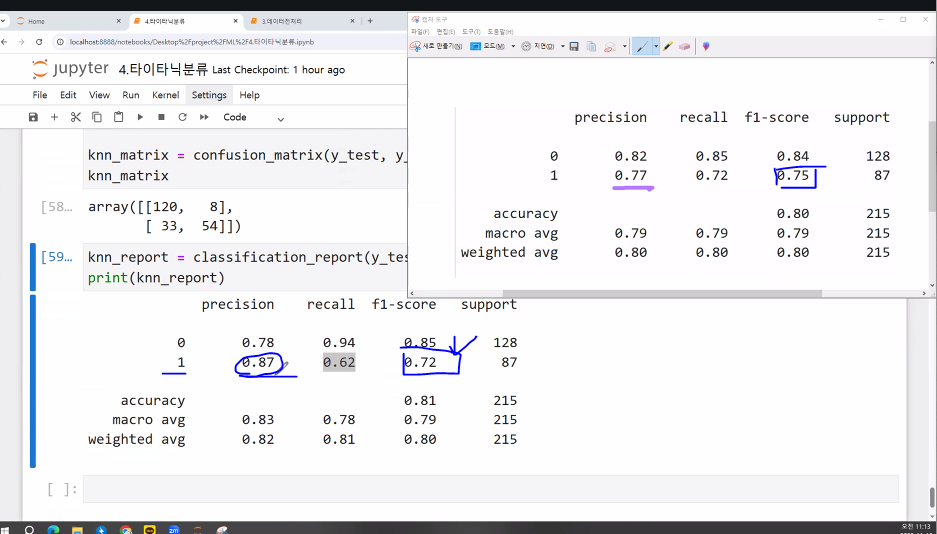

- 숫자나 분석방법에 매몰되지 말고
- 상식선에서 다시 돌아보는 방법(엄마한테 물어보기)을 이용해봐라